In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import BatchNormalization
from keras.callbacks import LearningRateScheduler, ReduceLROnPlateau
from keras.models import load_model
from keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from skimage.transform import resize, rotate
import numpy as np
import cv2
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    validation_split=0.2,
    )
# test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
x_train = train_datagen.flow_from_directory(
    'gdrive/MyDrive/Dataset5',
    target_size=(28,28),
    batch_size=64,
    # save_to_dir='Dataset4/aug_set',
    class_mode='categorical',
    color_mode="grayscale",
    subset="training",
    )
x_test = train_datagen.flow_from_directory(
    'gdrive/MyDrive/Dataset5',
    target_size=(28,28),
    batch_size=64,
    class_mode='categorical',
    color_mode="grayscale",
    subset="validation",
    )
# x_test = train_datagen.flow_from_directory('Dataset/test_set', target_size=(64,64), batch_size=200, class_mode='categorical', color_mode="grayscale")

Found 22413 images belonging to 9 classes.
Found 5598 images belonging to 9 classes.


In [ ]:
model = Sequential()

In [ ]:
model.add(Convolution2D(75, (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2) , strides = 2 , padding = 'same'))
model.add(Convolution2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2) , strides = 2 , padding = 'same'))
model.add(Convolution2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dropout(0.6))
model.add(Dense(units = 9 , activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 75)        750       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 75)       300       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 75)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 50)        33800     
                                                                 
 dropout (Dropout)           (None, 14, 14, 50)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 50)       2

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

In [ ]:
track=model.fit(
    x_train,
    steps_per_epoch=351,
    epochs=50,
    validation_data=x_test,
    validation_steps=88,
    initial_epoch=0,
    # callbacks=[LearningRateScheduler(adjustLearningRate)]
    callbacks=[learning_rate_reduction]
    )

Epoch 1/50
351/351 [==============================] - 7399s 21s/step - loss: 1.6879 - accuracy: 0.3894 - val_loss: 8.9837 - val_accuracy: 0.1238 - lr: 0.0100
Epoch 2/50
351/351 [==============================] - 187s 534ms/step - loss: 1.0259 - accuracy: 0.6152 - val_loss: 1.4851 - val_accuracy: 0.4360 - lr: 0.0100
Epoch 3/50
351/351 [==============================] - 184s 524ms/step - loss: 0.8282 - accuracy: 0.6927 - val_loss: 1.5657 - val_accuracy: 0.4477 - lr: 0.0100
Epoch 4/50
351/351 [==============================] - 184s 522ms/step - loss: 0.7172 - accuracy: 0.7361 - val_loss: 1.3837 - val_accuracy: 0.5046 - lr: 0.0100
Epoch 5/50
351/351 [==============================] - 185s 525ms/step - loss: 0.6563 - accuracy: 0.7660 - val_loss: 1.6591 - val_accuracy: 0.5063 - lr: 0.0100
Epoch 6/50
351/351 [==============================] - 188s 535ms/step - loss: 0.6127 - accuracy: 0.7829 - val_loss: 1.8612 - val_accuracy: 0.4325 - lr: 0.0100
Epoch 7/50
351/351 [===========================

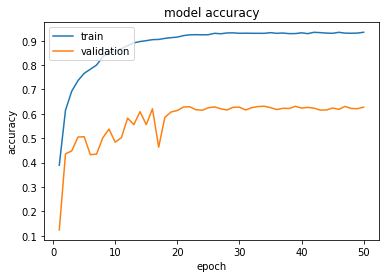

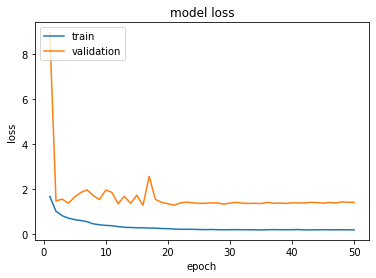

In [ ]:
plt.figure(1)
plt.plot([1+i for i in track.epoch],track.history['accuracy'])
plt.plot([1+i for i in track.epoch],track.history['val_accuracy'])
# plt.xlim((1,5))
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.figure(2)
plt.plot([1+i for i in track.epoch],track.history['loss'])
plt.plot([1+i for i in track.epoch],track.history['val_loss'])
# plt.xlim((1,5))
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

88/88 [==============================] - 28s 318ms/step
Classification Report
              precision    recall  f1-score   support

           A       0.03      0.03      0.03       270
           B       0.08      0.13      0.10       419
           C       0.14      0.13      0.13       710
           D       0.10      0.08      0.09       643
           E       0.09      0.07      0.08       509
           F       0.18      0.13      0.15       969
           G       0.17      0.16      0.16       908
           H       0.09      0.14      0.11       527
           I       0.13      0.15      0.14       643

    accuracy                           0.12      5598
   macro avg       0.11      0.11      0.11      5598
weighted avg       0.13      0.12      0.12      5598



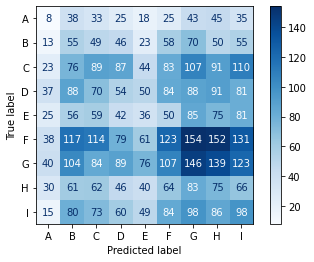

In [ ]:
y_pred = model.predict(x_test, x_test.samples // x_test.batch_size+1)
y_pred = np.argmax(y_pred, axis=1)
confmat=confusion_matrix(x_test.classes, y_pred)
labels = ['A','B','C','D','E','F','G','H','I']
classrep=classification_report(x_test.classes, y_pred, target_names=labels)
print('Classification Report')
print(classrep)
confmat_show=ConfusionMatrixDisplay(confusion_matrix=confmat, display_labels=labels)
confmat_show.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
model.save("weight17.h5")